$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt #package useful for plotting


#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  return np.array([[3000,4],[4,2]])

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  return np.cond()

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{Your Answer:}$

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?

$\textbf{Your Answer:}$

Write code to find the matrix $\mathbf{D}^k$. 

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  #compute and return D_k
  a=1/(evalh(x)[0][0])
  b=1/(evalh(x)[1][1])
  return np.array([[a, 0], [0, b]])
  

In [3]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (1500*(x[0]**2)) + (4*x[0]*x[1]) + (x[1]**2)


In [4]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([(3000*x[0]) + (4*x[1]), (4*x[0])+(2*x[1])]) 

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(x, gradf, A, b): #add appropriate arguments to the function 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code 
  num = np.dot(np.dot(x.T, A), gradf) + np.dot(np.dot(gradf.T, A), x) + 2*np.dot(b.T, gradf)
  den = 2*np.dot(np.dot(gradf.T, A), gradf)
  step_length = num/den
    
  return step_length 

In [6]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma, *args): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  #Complete the code 
  alpha = alpha_start
  pk = -gradf
  while evalf(np.add(x, alpha*pk)) > np.add(evalf(x), gamma*alpha*np.dot(gradf.T,pk)):
    alpha = rho*alpha

  return alpha
  

In [7]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma, *args): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0. 
  
  
  
  #Complete the code 
  alpha = alpha_start
  pk = -gradf
  while evalf(np.add(x, alpha*np.dot(direction,pk))) > np.subtract(evalf(x), gamma*alpha*np.dot(np.dot(direction,gradf), gradf)):
    alpha = rho*alpha
  return alpha

In [8]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [9]:
#complete the code for gradient descent to find the minimizer

def find_minimizer_gd(start_x, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
    assert type(tol) is float and tol>=0 

    # constructing a suitable A matrix and b vector for the quadratic function 
    A = np.array([[1500,2],[2,1]])
    b = np.array([0.,0.])
    x = start_x
    g_x = evalg(x)

    #initialization for backtracking line search
    if(line_search_type == BACKTRACKING_LINE_SEARCH):
        alpha_start = args[0]
        rho = args[1]
        gamma = args[2]
        # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

    k = 0
    #   print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

    while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    
        if line_search_type == EXACT_LINE_SEARCH:
            step_length = compute_steplength_exact(x, g_x, A, b) #call the new function you wrote to compute the steplength
        elif line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
        elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
            step_length = 0.1
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        #implement the gradient descent steps here   
        x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
        k += 1 #increment iteration
        g_x = evalg(x) #compute gradient at new point

        # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    return x, evalf(x), k 
 

In [10]:
# Code for gradient descent with scaling to find the minimizer with scaling

def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
    assert type(tol) is float and tol>=0 

    #constructing a suitable A matrix and b vector for the quadratic function 
    A = np.array([[1500,2],[2,1]])
    b = np.array([0.,0.])
    x = start_x
    g_x = evalg(x)
    d_k = compute_D_k(x)

    #initialization for backtracking line search
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    # print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

    k = 0
    #   print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

    while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking_scaled_direction(x, g_x, d_k, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
        else:  
            raise ValueError('Line search type unknown. Please check!')
        
        #implement the gradient descent steps here   
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x))) #update x = x - step_length*g_x
        k += 1 #increment iteration
        g_x = evalg(x) #compute gradient at new point

        # print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    return x, evalf(x), k 
 

Code for answer 8

In [11]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [12]:
#check gradient descent with exact line search 
x_opt_exact, f_exact, iter_exact= find_minimizer_gd(my_start_x, my_tol, EXACT_LINE_SEARCH)
print("Minimizer =", x_opt_exact)
print("Minimum function value =", f_exact)
print("No of iterations =", iter_exact)

Minimizer = [-7.44595231e-16  4.61544291e-13]
Minimum function value = 2.124801107784775e-25
No of iterations = 14075


In [13]:
#check gradient descent with backtracking line search without scaling
alpha_start = 1.
rho = 0.5
gamma = 0.5

x_opt_bls, f_bls, iter_bls = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer =", x_opt_bls)
print("Minimum function value =", f_bls)
print("No of iterations =", iter_bls)

Minimizer = [-4.78532202e-16  4.53575301e-13]
Minimum function value = 2.0520584176089396e-25
No of iterations = 21985


In [14]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5

x_opt_bls_scaling, f_bls_scaling, iter_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer =", x_opt_bls_scaling)
print("Minimum function value =", f_bls_scaling)
print("No of iterations =", iter_bls_scaling)

Minimizer = [-2.31674405e-18  9.60515434e-16]
Minimum function value = 9.217397790469283e-31
No of iterations = 16


Code for answer 9

In [15]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12
alpha=[1., 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
rho=0.5
gamma=0.5

In [16]:
iter91=[]
print("Alpha \t Minimizer \t Minimum function value \t No of iterations")
for i in alpha:
  x_opt_bls, f_bls, iter_bls= find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, rho,gamma)
  iter91.append(iter_bls)
  print(i,"\t", x_opt_bls, "\t", f_bls, "\t", iter_bls)

Alpha 	 Minimizer 	 Minimum function value 	 No of iterations
1.0 	 [-4.78532202e-16  4.53575301e-13] 	 2.0520584176089396e-25 	 21985
0.9 	 [-5.48799355e-16  4.71515450e-13] 	 2.2174352131747877e-25 	 15941
0.75 	 [-7.18643891e-16  4.89175378e-13] 	 2.386610528547938e-25 	 6750
0.6 	 [-6.07554226e-16  4.94036636e-13] 	 2.43425264283868e-25 	 6887
0.5 	 [-4.78532202e-16  4.53575301e-13] 	 2.0520584176089396e-25 	 21985
0.4 	 [-7.24091328e-16  4.84454819e-13] 	 2.3407977615582728e-25 	 11362
0.25 	 [-4.78532202e-16  4.53575301e-13] 	 2.0520584176089396e-25 	 21985
0.1 	 [-7.24091328e-16  4.84454819e-13] 	 2.3407977615582728e-25 	 11362
0.01 	 [-5.80852788e-16  4.86459735e-13] 	 2.3601891237044125e-25 	 5509


In [17]:
iter92=[]
print("Alpha \t Minimizer \t Minimum function value \t No of iterations")
for i in alpha:
  x_opt_bls_scaling, f_bls_scaling, iter_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, i, rho, gamma)
  iter92.append(iter_bls_scaling)
  print(i,"\t", x_opt_bls_scaling, "\t", f_bls_scaling, "\t", iter_bls_scaling)

Alpha 	 Minimizer 	 Minimum function value 	 No of iterations
1.0 	 [-2.31674405e-18  9.60515434e-16] 	 9.217397790469283e-31 	 16
0.9 	 [-1.54825431e-16  5.99636318e-15] 	 6.819918471923904e-29 	 21
0.75 	 [-2.78273450e-16  1.07784868e-14] 	 2.203324807217381e-28 	 32
0.6 	 [-3.37385169e-16  1.30849588e-14] 	 3.2430059206322154e-28 	 47
0.5 	 [-2.51144512e-16  9.75949896e-15] 	 1.800539902805011e-28 	 62
0.4 	 [-3.26530890e-16  1.27315971e-14] 	 3.0539815808527928e-28 	 83
0.25 	 [-2.68853026e-16  1.05480788e-14] 	 2.0834135979657747e-28 	 147
0.1 	 [-3.34815103e-16  1.32481337e-14] 	 3.2592207464795465e-28 	 397
0.01 	 [-3.51028779e-16  1.39670836e-14] 	 3.602998362211868e-28 	 4146


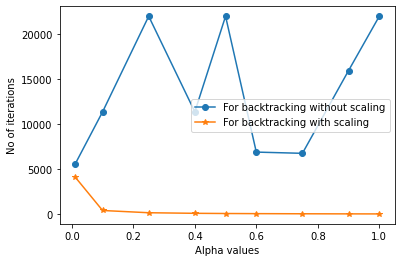

In [18]:
#we will plot the function values and check the behavior
plt.plot(alpha, iter91, 'o-', label = 'For backtracking without scaling')
plt.plot(alpha, iter92, '*-', label = 'For backtracking with scaling')
plt.ylabel('No of iterations')
plt.xlabel('Alpha values')
plt.legend()
plt.show()

Code for answer 10

In [19]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12
rho=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
alpha=1.
gamma=0.5

In [20]:
iter101=[]
print("Rho \t Minimizer \t Minimum function value \t No of iterations")
for i in rho:
  x_opt_bls, f_bls, iter_bls = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, i, gamma)
  iter101.append(iter_bls)
  print(i, "\t", x_opt_bls, "\t", f_bls, "\t", iter_bls)

Rho 	 Minimizer 	 Minimum function value 	 No of iterations
0.9 	 [-6.44686128e-16  4.90962904e-13] 	 2.404019351870065e-25 	 127
0.75 	 [-7.15454842e-16  4.83616543e-13] 	 2.332687511412074e-25 	 3135
0.6 	 [-7.07691748e-16  4.70469643e-13] 	 2.2076113616544364e-25 	 15834
0.5 	 [-4.78532202e-16  4.53575301e-13] 	 2.0520584176089396e-25 	 21985
0.4 	 [-5.16461460e-16  4.67846629e-13] 	 2.1831406770108246e-25 	 20049
0.25 	 [-5.67128954e-16  4.70177132e-13] 	 2.204823842206756e-25 	 24570
0.1 	 [-4.35224428e-16  4.42644725e-13] 	 1.9544788340231146e-25 	 45435
0.01 	 [-6.03891924e-16  4.89972672e-13] 	 2.394366854291179e-25 	 17463


In [21]:
iter102=[]
print("Rho \t Minimizer \t Minimum function value \t No of iterations")
for i in rho:
  x_opt_bls_scaling, f_bls_scaling, iter_bls_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, i, gamma)
  iter102.append(iter_bls_scaling)
  print(i,"\t", x_opt_bls_scaling, "\t", f_bls_scaling, "\t", iter_bls_scaling)

Rho 	 Minimizer 	 Minimum function value 	 No of iterations
0.9 	 [-1.90920422e-16  3.38018326e-15] 	 6.352016622002106e-29 	 14
0.75 	 [-3.59593964e-18  9.57478862e-16] 	 9.223897999650174e-31 	 15
0.6 	 [-2.68496827e-18  1.53311688e-15] 	 2.3447954703965872e-30 	 15
0.5 	 [-2.31674405e-18  9.60515434e-16] 	 9.217397790469283e-31 	 16
0.4 	 [-2.10920879e-18  1.38155681e-15] 	 1.903716407388883e-30 	 16
0.25 	 [-6.9534609e-16  4.5561674e-13] 	 2.0704462793405916e-25 	 16
0.1 	 [-6.22892805e-16  4.51919078e-13] 	 2.0368685744853975e-25 	 23
0.01 	 [-5.88632151e-16  4.39928337e-13] 	 1.9302084997635662e-25 	 130


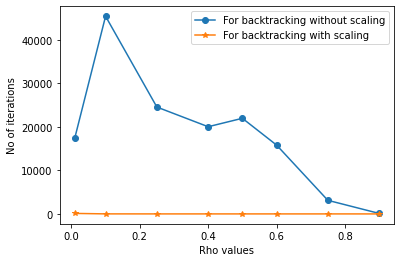

In [22]:
#we will plot the function values and check the behavior
plt.plot(rho, iter101, 'o-', label = 'For backtracking without scaling')
plt.plot(rho, iter102, '*-', label = 'For backtracking with scaling')
plt.ylabel('No of iterations')
plt.xlabel('Rho values')
plt.legend()
plt.show()

Answer 4) The matrix Q whose condition number needs to be analyzed can be taken to be $\nabla^2_y f(y)$ = $\mathbf{M}^\top \nabla^2_x f(x) \mathbf{M}$ where $\nabla^2f(x)$ is the Hessian of the function f(x) and $\mathbf{M} = \mathbf{D}^{\frac{1}{2}}$.

Answer 5) Assuming $\mathbf{D}^k$ to be a diagonal matrix, we can take $\mathbf{D}^k$ to be the diagonal approximation of the inverse of $\nabla^2 f(\mathbf{x})$ (Hessian of the function f(X)) which gives us:

$\begin{aligned}
\mathbf{D}^k = \begin{bmatrix} \frac{1}{f_{x_1 x_1}} & 0\\ 0 & \frac{1}{f_{x_2 x_2}} \end{bmatrix}
\end{aligned}
$ where $f_{x_1 x_1} = \frac{\partial^2f(\mathbf{x})}{\partial x_1^2}$ and  $f_{x_2 x_2} = \frac{\partial^2f(\mathbf{x})}{\partial x_2^2}$

Based on our given function, the matrix $\mathbf{D}^k$ comes out to be $\begin{bmatrix} \frac{1}{3000} & 0\\ 0 & \frac{1}{2} \end{bmatrix}$

Answer 7) Minimizer = [0,0] and the minimum function value = 0

Answer 8)

**Gradient descent with exact line search**

Minimizer = [-7.44595231e-16  4.61544291e-13]

Minimum function value = 2.124801107784775e-25

No of iterations = 14075

**Gradient descent with backtracking line search without scaling**

Minimizer = [-4.78532202e-16  4.53575301e-13]

Minimum function value = 2.0520584176089396e-25

No of iterations = 21985

**Gradient descent with backtracking line search with scaling**

Minimizer = [-2.31674405e-18  9.60515434e-16]

Minimum function value = 9.217397790469283e-31

No of iterations = 16

**Observations:** Gradient descent with bracking line search without scaling takes the most number of iterations, followed by gradient descent with exact line search and then gradient descent with backtracking line search with scaling. By observing the minimizer and the minimum function value, best convergence (minimizer close to [0,0] and minimum function value close to 0) is seen in gradient descent with backtracking line search with scaling, followed by gradient descent with backtracking line search without scaling and then gradient descent with exact line search. 


Answer 9) Backtracking line search with scaling uses fewer iterations and gives better result (minimizer close to [0,0] and minimum function value close to 0) than backtracking line search without scaling. Number of iterations with backtracking line search without scaling does not follow any trend with increase in alpha values but they decrease with increase in alpha values in case of backtracking line search with scaling.

Answer 10) Backtracking line search with scaling uses fewer iterations and gives better result (minimizer close to [0,0] and minimum function value close to 0) than backtracking line search without scaling. Number of iterations with backtracking line search without scaling decreases (exceptions being rho=0.01 and rho=0.5) with increase in rho values and they decrease very gradually with increase in rho values in case of backtracking line search with scaling.